In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")

In [95]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


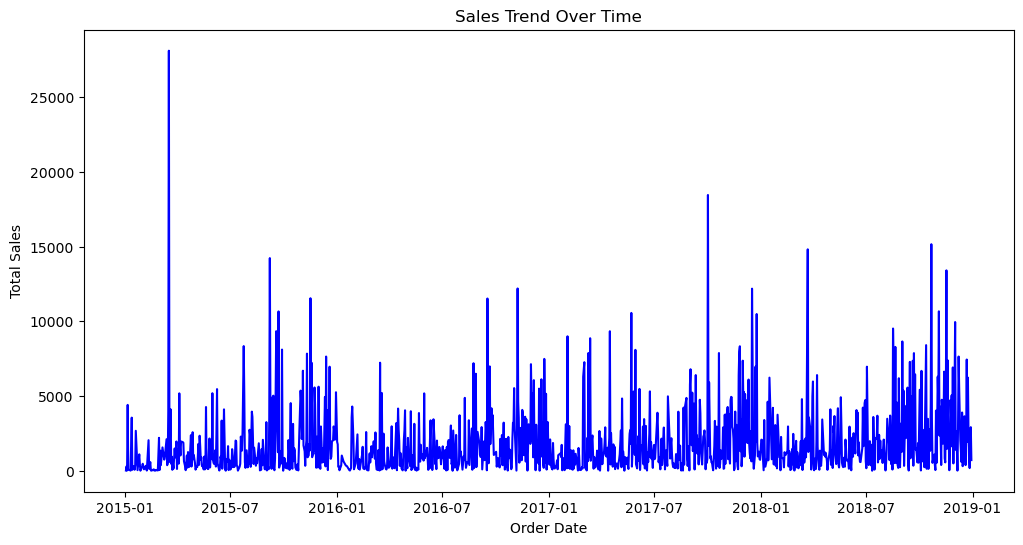

In [23]:
# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")

# Group by order date
sales_trend = df.groupby("Order Date")["Sales"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, color="blue")
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()

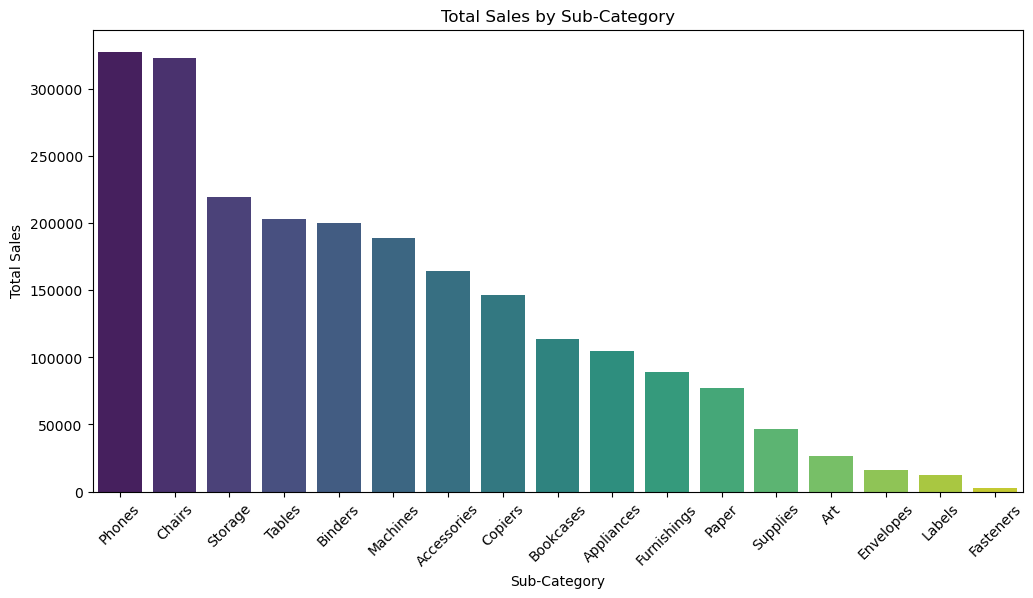

In [63]:
# Group by product category
category_sales = df.groupby('Sub-Category').agg(Total_Sales=('Sales', 'sum')).sort_values(by="Total_Sales", ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales["Total_Sales"], hue=category_sales.index, palette="viridis", legend=False)

plt.title("Total Sales by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

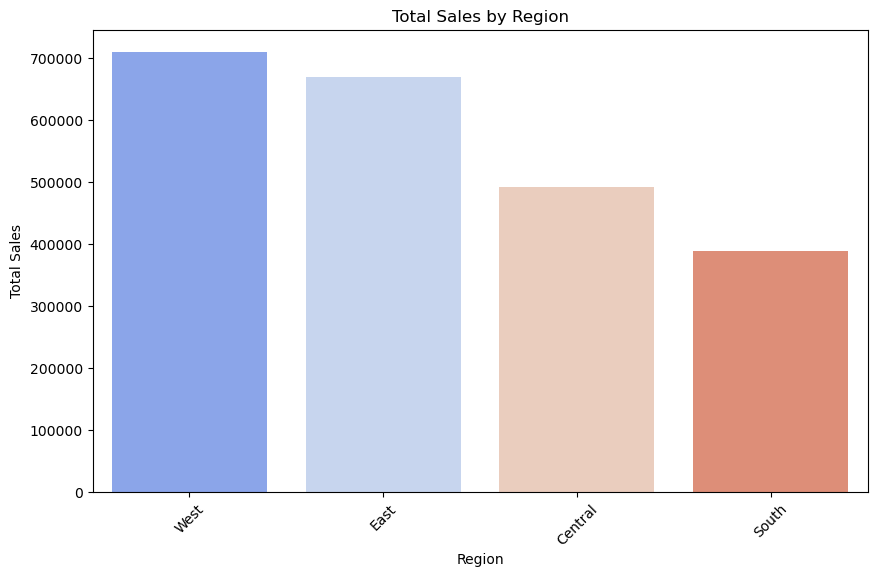

In [71]:
# Aggregate total sales by region
region_sales = df.groupby("Region").agg(Total_Sales=("Sales", "sum")).sort_values(by="Total_Sales", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales["Total_Sales"], hue=region_sales.index, palette="coolwarm", legend=False)

plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

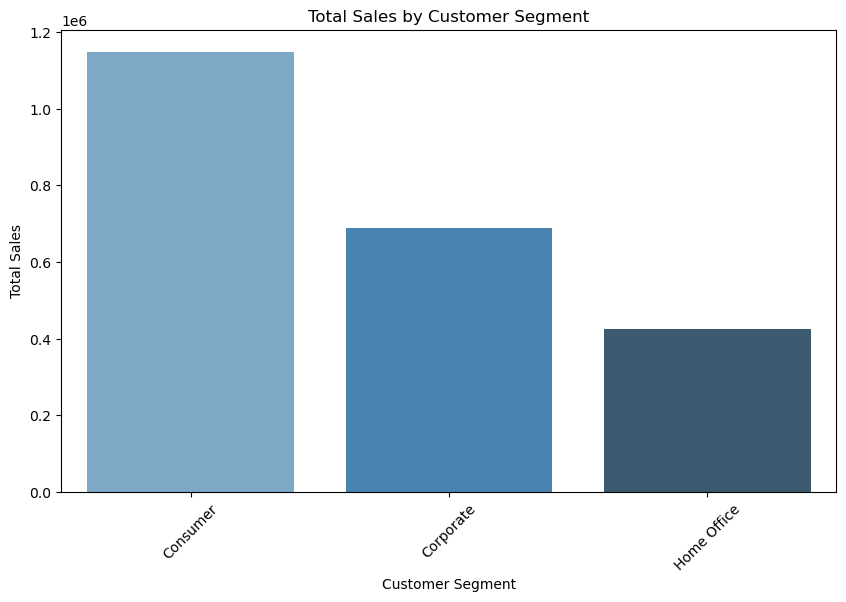

In [87]:
# Aggregate total sales by customer segment
segment_sales = df.groupby("Segment").agg(Total_Sales=("Sales", "sum")).sort_values(by="Total_Sales", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_sales.index, y=segment_sales["Total_Sales"], palette="Blues_d", hue=segment_sales.index, legend=False)

plt.title("Total Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

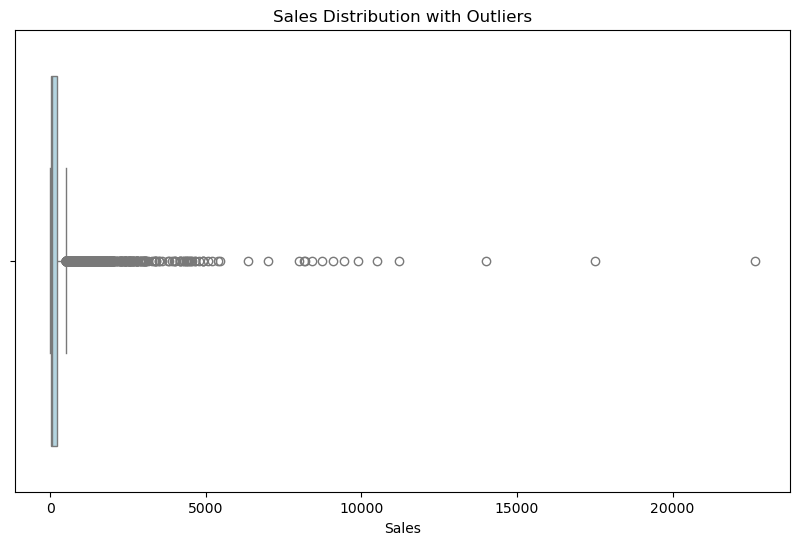

In [89]:
# Plot a boxplot to detect outliers in sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Sales"], color="lightblue")

plt.title("Sales Distribution with Outliers")
plt.xlabel("Sales")
plt.show()

In [93]:
# Calculating the IQR
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers
outliers = df[(df["Sales"] < lower_bound) | (df["Sales"] > upper_bound)]

print(outliers[["Order ID", "Sales", "Category", "Sub-Category"]])

            Order ID      Sales         Category Sub-Category
1     CA-2017-152156   731.9400        Furniture       Chairs
3     US-2016-108966   957.5775        Furniture       Tables
7     CA-2015-115812   907.1520       Technology       Phones
10    CA-2015-115812  1706.1840        Furniture       Tables
11    CA-2015-115812   911.4240       Technology       Phones
...              ...        ...              ...          ...
9759  CA-2017-146913  1403.9200        Furniture       Chairs
9774  CA-2015-169019  2177.5840  Office Supplies      Binders
9781  CA-2017-153178   673.5680  Office Supplies      Binders
9787  CA-2018-144491  1023.3320        Furniture    Bookcases
9788  CA-2018-144491   600.5580        Furniture       Chairs

[1145 rows x 4 columns]
